# This is example 6.2 Random walk from Sutton's book


In [22]:
import numpy as np
import sys
# import importlib
# for visualizing value functions of RL algorithms:
import matplotlib.pyplot as plt
import matplotlib
if "../" not in sys.path:
  sys.path.append("../")

from collections import defaultdict

from lib.envs.random_walk_with_grid import RandomWalk

# importlib.reload(lib.envs.random_walk_with_grid.RandomWalk)

from lib import plotting

matplotlib.style.use('ggplot')

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## setting the the random walk world:

In [24]:

shape = [3, 7] # the one in the book

# since positive and negative terminal states are not set
# they should be in the top left and bottom right corners

# and of reward 1, and 0 respectively
reward_into_neg_term_states = 0.01
env = RandomWalk(shape = shape, positive_terminal_states = None,
                 negative_terminal_states = None, reward_into_pos_term_states = 1,
                 reward_into_neg_term_states = reward_into_neg_term_states , drift_vector_prob = None, initial_state_distribution = None)

print(env.reset())
env.render()


drift vector prob: {(0, 1): 0.25, (0, -1): 0.25, (1, 0): 0.25, (-1, 0): 0.25, (0, 0): 0}
here is the world, with 1 indicating positive terminal states.              and 0.01 indicating negative terminal states: 
initializing position is in middle
probability disbribution for starting state:  [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
state is  0
pos is  0 0
is done: True
state is  1
pos is  0 1
is done: False
starting state position:  [0 1]
start calculating transition prob....
before limiting coord:  [-1  2]
             next pos: (0, 2)
before limiting coord:  [-1  0]
             next pos: (0, 0)
before limiting coord:  [0 1]
             next pos: (0, 1)
before limiting coord:  [-2  1]
             next pos: (0, 1)
before limiting coord:  [-1  1]
             next pos: (0, 1)


starting state position:  [0 1]
start calculating transition prob....
before limiting coord:  [1 2]
             next pos: (1, 2)
before limiting coord:  [1 0]
             next

In [25]:

# remember (please check random_walk_with_grid file to make sure):
STAY = 0
RIGHT = 1
LEFT = 2
UP = 3
DOWN = 4

print(env.reset())
env.render()

print(env.step(0))
env.render()

print(env.step(1))
env.render()

print(env.step(1))
env.render()

print(env.step(2))
env.render()

10
0.01 O  O  O  O  O  O

O  O  O  x  O  O  O

O  O  O  O  O  O 1

(11, 0.0, False, {'prob': 0.25})
0.01 O  O  O  O  O  O

O  O  O  O  x  O  O

O  O  O  O  O  O 1

(11, 0.0, False, {'prob': 0.25})
0.01 O  O  O  O  O  O

O  O  O  O  x  O  O

O  O  O  O  O  O 1

(13, 0.0, False, {'prob': 0.25})
0.01 O  O  O  O  O  O

O  O  O  O  O  O  x

O  O  O  O  O  O 1

(13, 0.0, False, {'prob': 0.25})
0.01 O  O  O  O  O  O

O  O  O  O  O  O  x

O  O  O  O  O  O 1



# Now, set up the world in which the environment is independent of the action, just as in the book

This is equivalent to setting policy to be always choose STAY

In [26]:
def always_stay_policy(state):
    
    return 0

In [27]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!

    # keep looping through episodes:
    for epi in range(num_episodes):

        # Print out which episode we're on, useful for debugging.
        if epi % 1000 == 0:
            print("\rEpisode {}/{}.".format(epi, num_episodes), end="")
            sys.stdout.flush()

        # initialize the environment to its initial state
        observation = env.reset()

        # optional: keep track of which states have appeared in the current episode,

        returns_in_current_episode = dict()


        # for each episode until a terminal state is reached:
        # following policy during the episode:
        while True: # keep going until the end of the epidsode:

            # action = np.argmax(policy(observation))
            action = policy(observation)
            observation_next, reward, done, _ = env.step(action)
            # print('reward is ', reward)


            # for all obserations that have appeared before,
            # simply add the new discounted  to get culminulated
            # so far:
            for obs in returns_in_current_episode:
                num_of_steps_since_state_appeared = returns_in_current_episode[obs][1]
                returns_in_current_episode[obs] += np.array([reward*(discount_factor**num_of_steps_since_state_appeared), 1.0])


            if observation not in returns_in_current_episode:
                # set reward for new observation:
                returns_in_current_episode[observation] = np.array([reward, 1.0], dtype ='float64')
            
            
            # increase all count to end by one:
            # for obs_seen_in_epi in returns_in_current_episode:
            #     returns_in_current_episode[obs_seen_in_epi] += np.array([0, 1])

            observation = observation_next
            if done: 
                break

        # at the end of each episode, find the return:
        for obs in returns_in_current_episode:
            returns_sum[obs] += returns_in_current_episode[obs][0]
            returns_count[obs] += 1


    # at the end, calculate the average return on each first visit:
    for obs in returns_sum:
        if returns_count[obs] != 0:
            V[obs] = returns_sum[obs]/returns_count[obs]
        





    return V    

In [28]:
env.nS

21

In [29]:
V_10k = mc_prediction(always_stay_policy, env, num_episodes=100000)


Episode 99000/100000.

In [34]:
sorted(V_10k.keys())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 24,
 25,
 26,
 30,
 31,
 32,
 36,
 37,
 38]

In [31]:
env.shape

[3, 7]

Episode 9000/10000.

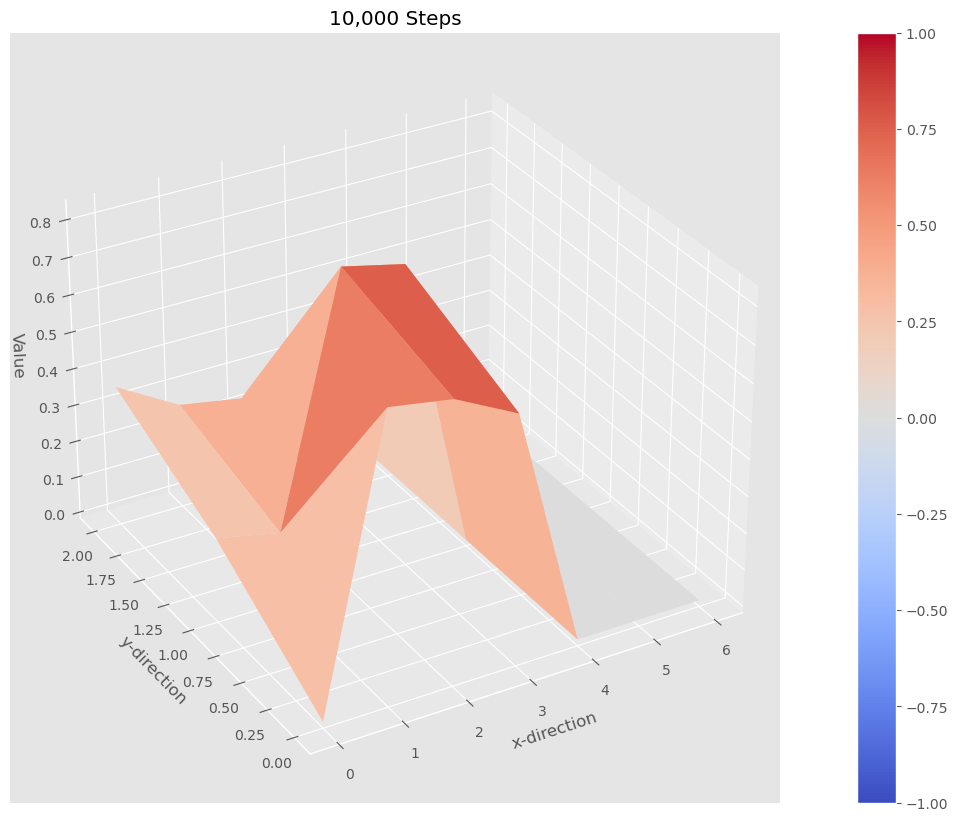

Episode 19000/20000.

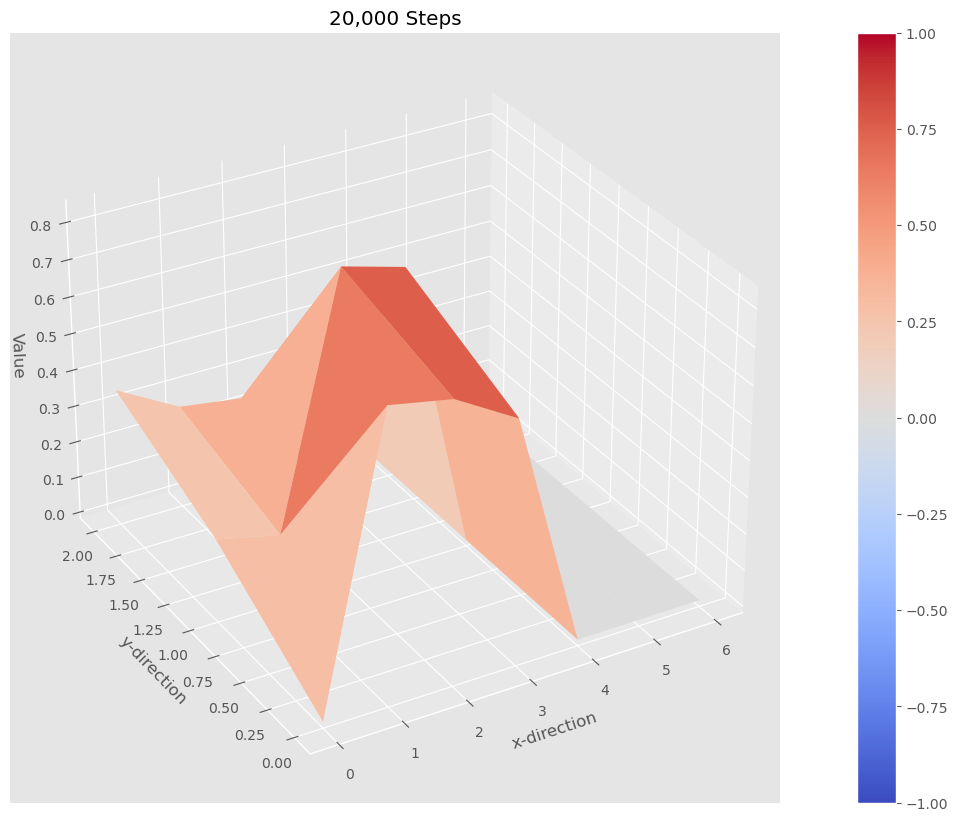

Episode 49000/50000.

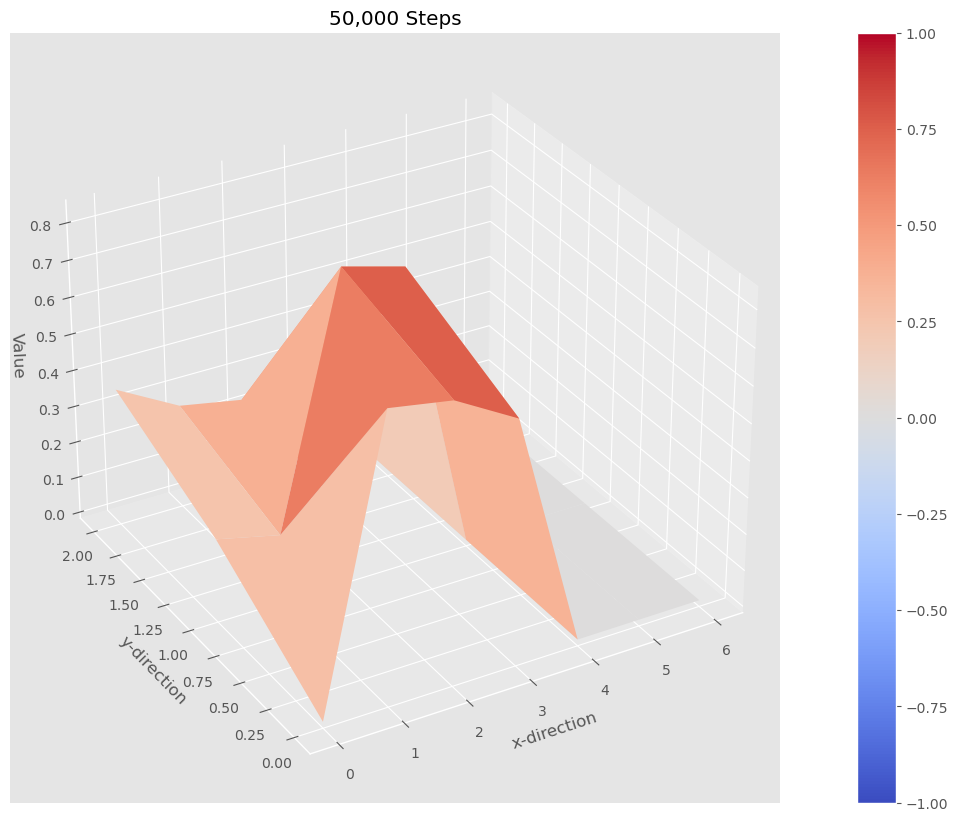

Episode 17000/100000.

KeyboardInterrupt: 

In [32]:
V_10k = mc_prediction(always_stay_policy, env, num_episodes=10000)
plotting.plot_value_function_of_grid_world(V_10k, title="10,000 Steps", shape = env.shape)

V_20k = mc_prediction(always_stay_policy, env, num_episodes=20000)
plotting.plot_value_function_of_grid_world(V_20k, title="20,000 Steps", shape = env.shape)

V_50k = mc_prediction(always_stay_policy, env, num_episodes=50000)
plotting.plot_value_function_of_grid_world(V_50k, title="50,000 Steps", shape = env.shape)

V_100k = mc_prediction(always_stay_policy, env, num_episodes=100000)
plotting.plot_value_function_of_grid_world(V_100k, title="100,000 Steps", shape = env.shape)

V_500k = mc_prediction(always_stay_policy, env, num_episodes=500000)
plotting.plot_value_function_of_grid_world(V_500k, title="500,000 Steps", shape = env.shape)

V_1000k = mc_prediction(always_stay_policy, env, num_episodes=1000000)
plotting.plot_value_function_of_grid_world(V_1000k, title="1,000,000 Steps", shape = env.shape)

In [35]:
%load_ext autoreload
%autoreload 2

shape = [1, 7] # the one in the book

# since positive and negative terminal states are not set
# they should be in the top left and bottom right corners

# and of reward 1, and 0 respectively
reward_into_neg_term_states = 0
env = RandomWalk(shape = shape, positive_terminal_states = None,
                 negative_terminal_states = None, reward_into_pos_term_states = 1,
                 reward_into_neg_term_states = reward_into_neg_term_states , drift_vector_prob = None, initial_state_distribution = None)

print(env.reset())
env.render()

V_10k = mc_prediction(always_stay_policy, env, num_episodes=10000)
V_10k

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
drift vector prob: {(0, 1): 0.25, (0, -1): 0.25, (1, 0): 0.25, (-1, 0): 0.25, (0, 0): 0}
here is the world, with 1 indicating positive terminal states.              and 0 indicating negative terminal states: 
initializing position is in middle
probability disbribution for starting state:  [[0. 0. 0. 1. 0. 0. 0.]]
state is  0
pos is  0 0
is done: False
starting state position:  [0 0]
start calculating transition prob....
before limiting coord:  [-1  1]
             next pos: (0, 1)
before limiting coord:  [-1 -1]
             next pos: (0, 0)
before limiting coord:  [0 0]
             next pos: (0, 0)
before limiting coord:  [-2  0]
             next pos: (0, 0)
before limiting coord:  [-1  0]
             next pos: (0, 0)


starting state position:  [0 0]
start calculating transition prob....
before limiting coord:  [1 1]
             next pos: (0, 1)
before limiting coord:  [ 1 -1]
             nex

defaultdict(float, {3: 1.0, 2: 1.0, 1: 1.0, 4: 1.0, 5: 1.0, 0: 1.0})